# Визуализация данных

Визуализация данных важна для их изучения и представления. Выражение «картина стоит тысячи слов» определенно применимо к пониманию данных. Из визуализаций часто можно получить информацию, которая не очевидна из сводной статистики.

Как правило, данные проще объяснить, опираясь на визуальное отображение. Подумайте, насколько информативнее может быть презентация с диаграммами и графиками. К счастью, в Python есть достаточно библиотек для визуализации.

## 1 Библиотека matplotlib

Библиотека `matplotlib` — базовый инструмент для создания готового к публикации графика. Он широко применяется сам по себе и в качестве основы для других библиотек с целью построения графиков. `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Есть много интерфейсов для применения `matplotlib`. Рекомендованный интерфейс для `matplotlib` — `pyplot`, который по соглашению
для удобства носит псевдоним `plt`:

In [ ]:
import matplotlib.pyplot as plt

Два основных понятия в `matplotlib` — это фигуры и оси. Первые используются для отображения данных в виде графика. Вторые — это области, на которых точки
могут быть заданы с помощью координат. Оси отображаются с помощью фигур. У одной фигуры может быть множество осей, но ось может быть прикреплена только к одной фигуре.

Полезные ссылки:

[Официальная документация](https://matplotlib.org/stable/)

[Хороший учебник по matplotlib](https://devpractice.ru/files/books/python/Matplotlib.book.pdf)

## 1.1 Построение графика

Построим наш первый график - квадратичная зависимость  $ y = 2*x^2 $ для $x$ от -10 до 10.

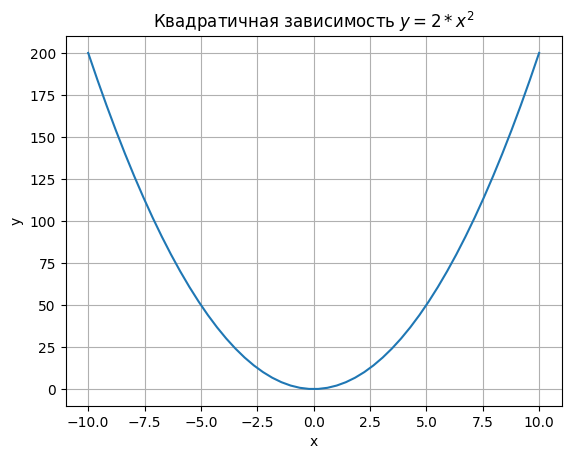

In [ ]:
import numpy as np
# Независимая (x) и зависимая (y) переменные
x = np.linspace(-10, 10, 50)
y = 2*x**2

# Построение графика
plt.title('Квадратичная зависимость $y = 2*x^2$') # заголовок
plt.xlabel('x') # ось абсцисс
plt.ylabel('y') # ось ординат
plt.grid() # включение отображение сетки
plt.plot(x, y) # построение графика

## 1.2 Несколько графиков на одном поле

Построим несколько графиков на одном поле, для этого добавим линейную зависимость:

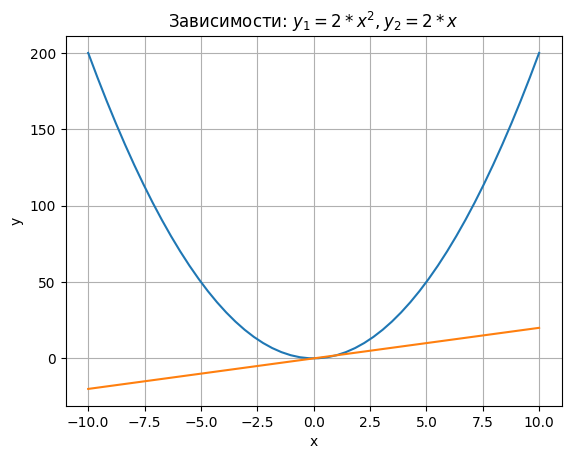

In [ ]:
y2 = 2*x

# Построение графика
plt.title('Зависимости: $y_1 = 2*x^2, y_2 = 2*x$') # заголовок
plt.xlabel('x') # ось абсцисс
plt.ylabel('y') # ось ординат
plt.grid() # включение отображение сетки
plt.plot(x, y, x, y2) # построение графика

В приведенном примере в функцию `plot()` последовательно передаются два массива для построения первого графика и два для построения второго, при этом, как вы можете заметить, для обоих графиков массив значений независимой переменной $x$ один и то же.

## 1.3 Представление графиков на разных полях

Третья, довольно часто встречающаяся задача - это отобразить два или более различных поля, на которых будет отображено по одному или
более графику. Построим уже известные нам две зависимость на разных полях:

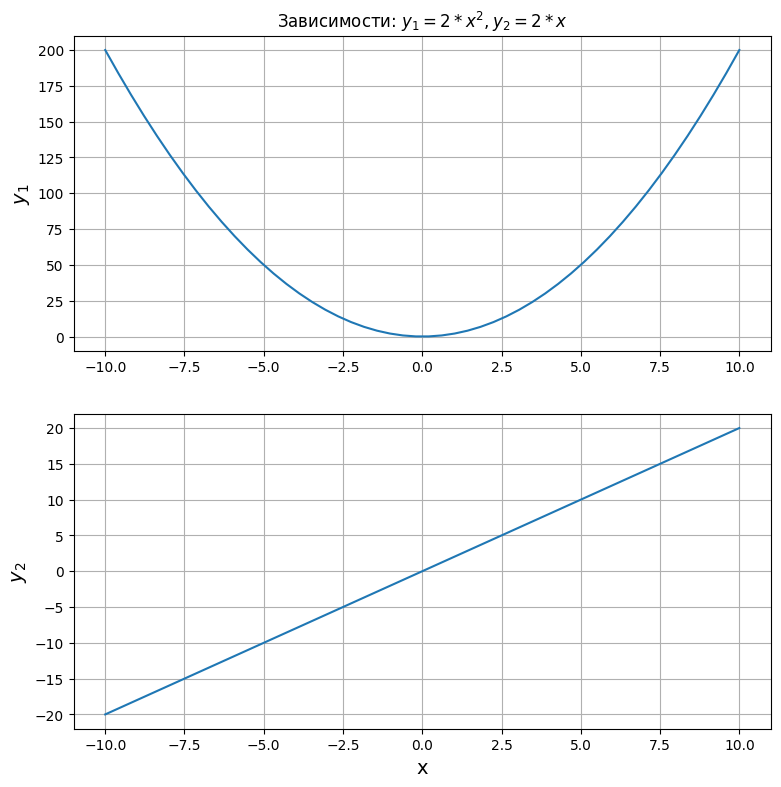

In [ ]:
# Построение графиков

plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.plot(x, y) # построение графика
plt.title('Зависимости: $y_1 = 2*x^2, y_2 = 2*x$') # заголовок
plt.ylabel('$y_1$', fontsize=14) # ось ординат
plt.grid(True) # включение отображение сетки

plt.subplot(2, 1, 2)
plt.plot(x, y2) # построение графика
plt.xlabel('x', fontsize=14) # ось абсцисс
plt.ylabel('$y_2$', fontsize=14) # ось ординат
plt.grid(True) # включение отображение сетки

Здесь мы воспользовались новыми функциями:
• `figure()` - функция для задания глобальных параметров отображения графиков. В нее, в качестве аргумента, мы передаем кортеж, определяющий размер общего поля.
• `subplot()` - функция для задания местоположения поля с графиком. Существует несколько способов задания областей для вывода графиков. В примере мы воспользовались вариантом, который предполагает передачу трех аргументов: первый аргумент - количество строк, второй - столбцов в формируемом поле, третий - индекс (номер поля, считаем сверху вниз, слева направо).

Остальные функции нам уже знакомы, дополнительно мы использовали параметр `fontsize` функций `xlabel()` и `ylabel()` для задания размера шрифта.

### 1.4 Основные элементы графика

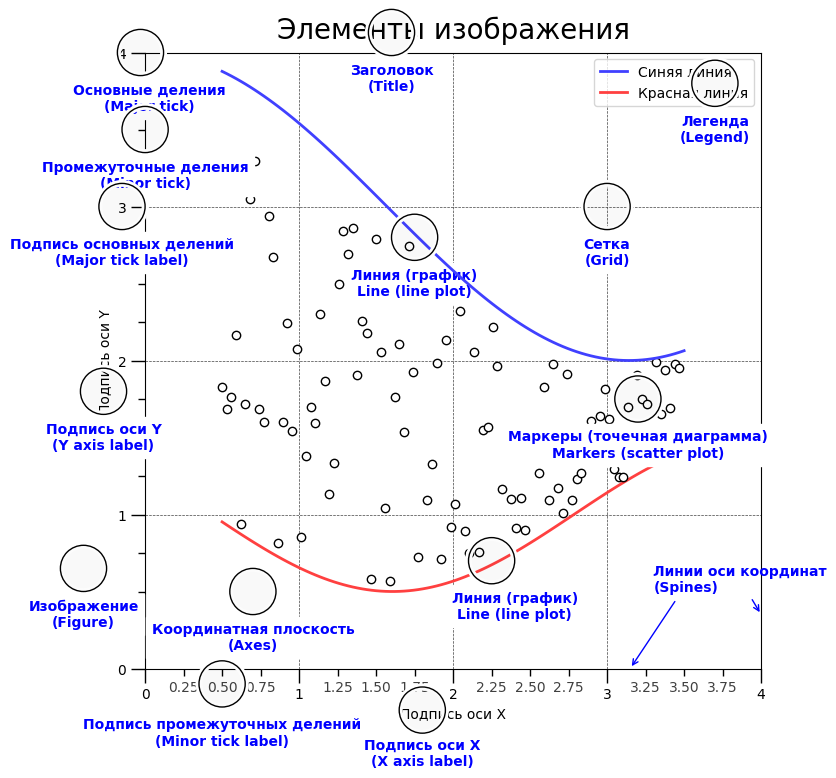

In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Синяя линия", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Красная линия")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Элементы изображения", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("Подпись оси X")
ax.set_ylabel("Подпись оси Y")

ax.legend(loc='upper right')


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Подпись промежуточных делений\n(Minor tick label)")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Основные деления\n(Major tick)")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Промежуточные деления\n(Minor tick)")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Подпись основных делений\n(Major tick label)")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "Подпись оси X\n(X axis label)")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Подпись оси Y\n(Y axis label)")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Заголовок\n(Title)")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Линия (график)\nLine (line plot)")

# Red plot
circle(2.25, 0.70)
text(2.4, 0.50, "Линия (график)\nLine (line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Маркеры (точечная диаграмма)\nMarkers (scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Сетка\n(Grid)")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Легенда\n(Legend)")

# Axes
circle(0.7, 0.5)
text(0.7, 0.3, "Координатная плоскость\n(Axes)")

# Figure
circle(-0.4, 0.65)
text(-0.4, 0.45, "Изображение\n(Figure)")

color = 'blue'
ax.annotate('Линии оси координат\n(Spines)', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

plt.show()

Корневым элементом при построении графиков в системе `Matplotlib` является Фигура (`Figure`). Все, что нарисовано на рисунке выше
является элементами фигуры. Рассмотрим ее составляющие более подробно.

#### 1.4.1 График

На рисунке выше представлены два графика - линейный и точечный. `Matplotlib` предоставляет огромное количество различных настроек, которые можно использовать для того, чтобы придать графику требуемый вид: задать цвет, толщину, тип, стиль линии и многое другое.

#### 1.4.2 Оси

Вторым, после непосредственно самого графика, по важности элементом фигуры являются оси. Для каждой оси можно задать метку (подпись), основные (`major`) и дополнительные (`minor`) элементы шкалы, их подписи, размер, толщину и диапазоны.

#### 1.4.3 Сетка и легенда

Сетка и легенда являются элементами фигуры, которые значительно повышают информативность графика. Сетка может быть основной (`major`) и дополнительной (`minor`). Каждому типу сетки можно задавать цвет, толщину линии и тип. Для отображения сетки и легенды используются соответствующие команды.

### 1.5 Текстовые надписи на графике

Наиболее часто используемые текстовые надписи на графике это:

* наименования осей;
* наименование самого графика;
* текстовые примечания на поле с графиком;
* легенда.

Для задания подписи оси $x$ используется функция `xlabel()`, оси $y$ - `ylabel()`.
Для задания заголовка графика используется функция `title()`.
За размещение текста на поле графика отвечает функция `text()`, которой первым и вторым аргументами передаются координаты позиции надписи, после - текст самой надписи.
Легенда будет размещена на графике, если вызвать функцию `legend()`.

Text(15, 4, 'grow up!')

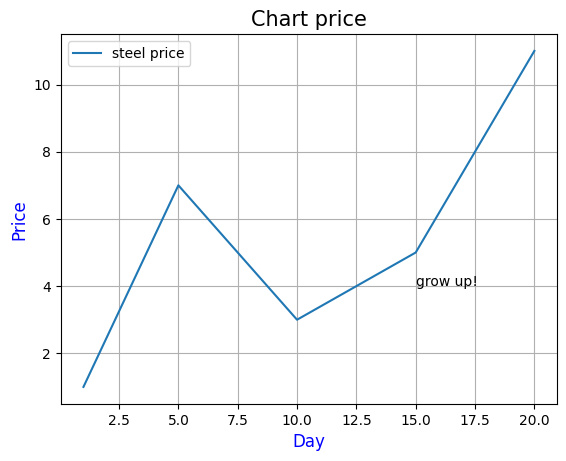

In [ ]:
x = [1, 5, 10, 15, 20]
y = [1, 7, 3, 5, 11]
plt.plot(x, y, label='steel price')
plt.title('Chart price', fontsize=15)
plt.xlabel('Day', fontsize=12, color='blue')
plt.ylabel('Price', fontsize=12, color='blue')
plt.legend()
plt.grid(True)
plt.text(15, 4, 'grow up!')

К перечисленным опциям мы добавили сетку, которая включается с помощью функции `grid(True)`.

### 1.6 Основные типы графиков

#### 1.6.1 Линейный график

**Линейный график** - это один из наиболее часто используемых видов графиков для визуализации данных. Для построения линейного графика используется функция `plot()`. Если вызвать функцию `plot()` с одним аргументом, то мы получим график, у которого по оси ординат (ось $y$) будут отложены значения из переданного списка, по оси абсцисс (ось $x$) - индексы элементов массива.

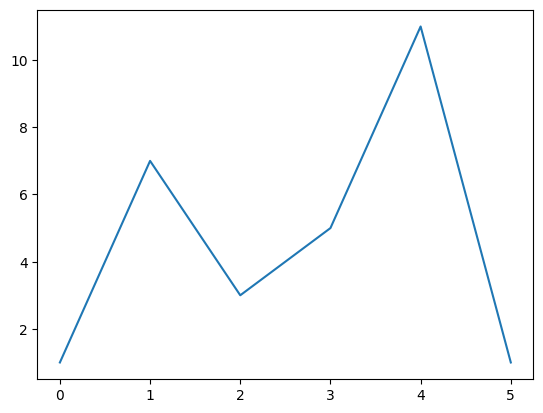

In [ ]:
plt.plot([1, 7, 3, 5, 11, 1])

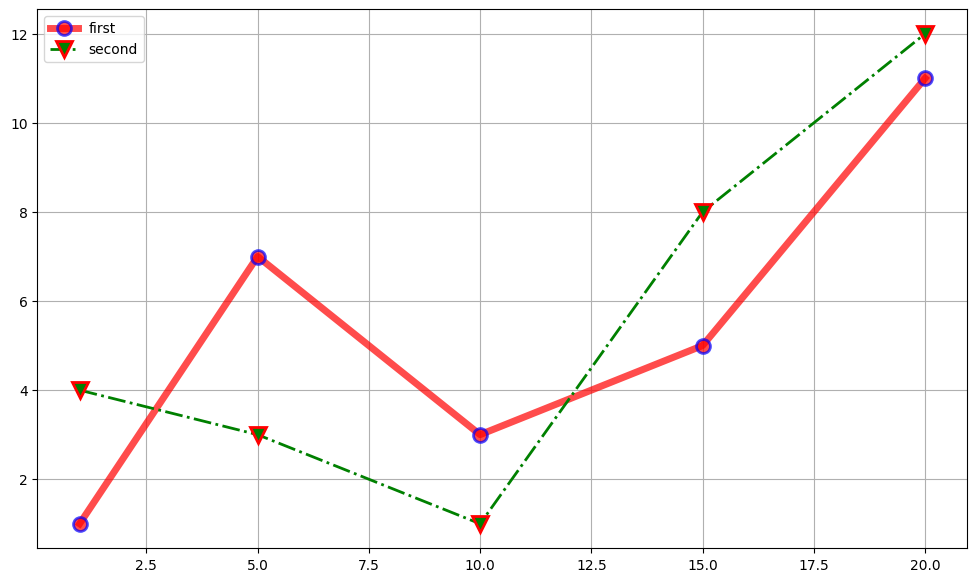

In [ ]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label='first', lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label='second', mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

#### 1.6.2 Точечный график

Для отображения точечного графика предназначена функция `scatter()`. В простейшем виде точечный график можно получить, передав функции `scatter()` наборы точек для $x$, $y$ координат:

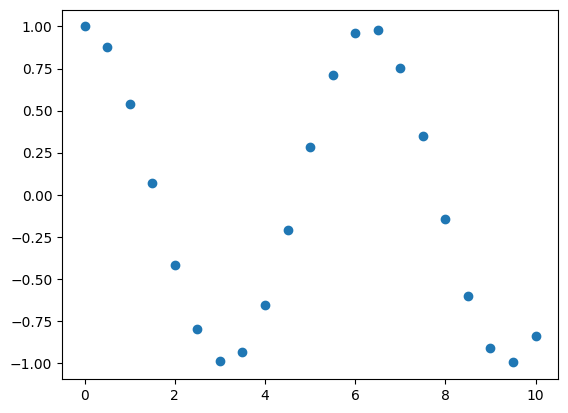

In [ ]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)
plt.scatter(x, y)

Пример использования параметров функции `scatter()`:

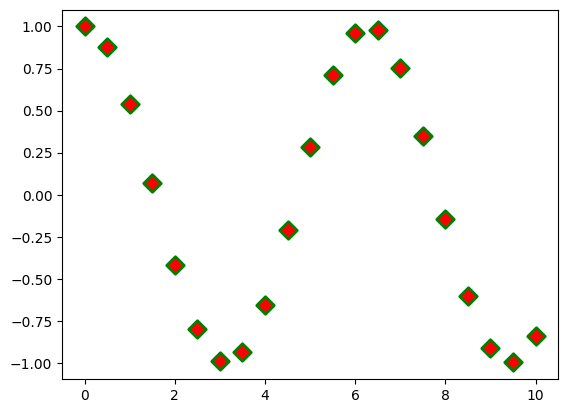

In [ ]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)
plt.scatter(x, y, s=80, c='r', marker='D', linewidths=2, edgecolors='g')

#### 1.6.3 Столбчатые диаграммы

Для визуализации категориальных данных хорошо подходят столбчатые диаграммы. Для их построения используются функции:
* `bar()` - вертикальная столбчатая диаграмма;
* `barh()` - горизонтальная столбчатая диаграмма.

<BarContainer object of 7 artists>

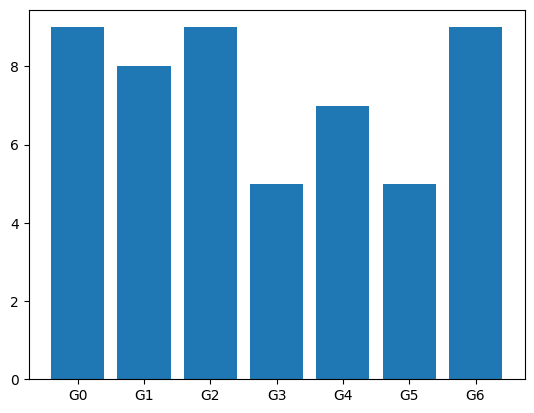

In [ ]:
np.random.seed(123)
groups = [f'G{i}' for i in range(7)]
counts = np.random.randint(3, 10, len(groups))
plt.bar(groups, counts)

<BarContainer object of 7 artists>

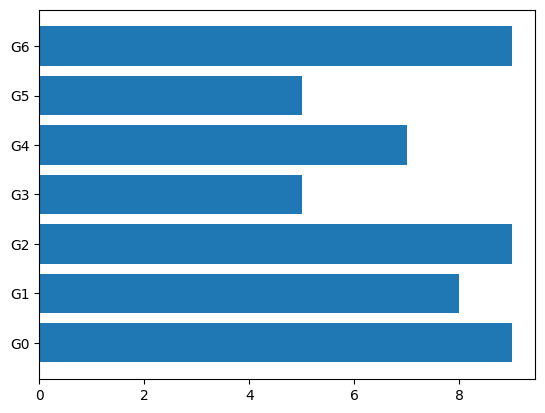

In [ ]:
plt.barh(groups, counts)

###### 1.6.3.1 Групповые столбчатые диаграммы

Используя определенным образом подготовленные данные можно строить групповые диаграммы:

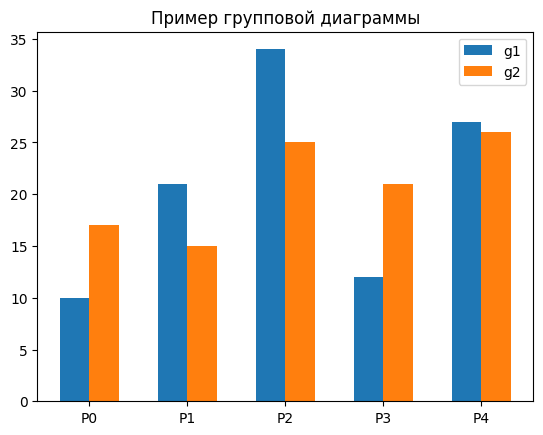

In [ ]:
cat_par = [f'P{i}' for i in range(5)]
g1 = [10, 21, 34, 12, 27]
g2 = [17, 15, 25, 21, 26]
width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='g1')
rects2 = ax.bar(x + width/2, g2, width, label='g2')
ax.set_title('Пример групповой диаграммы')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

#### 1.6.4 Гистограммы

Иногда данные требуется сгруппировать по определенным диапазонам и подсчитать сколько значений попадает в тот или иной интервал. Для выполнения такой задачи хорошо подходят столбчатые диаграммы и довольно известный их вид – это гистограмма распределения случайной величины.

Для построения гистограмм в `matplotlib` используется функция `hist()`.

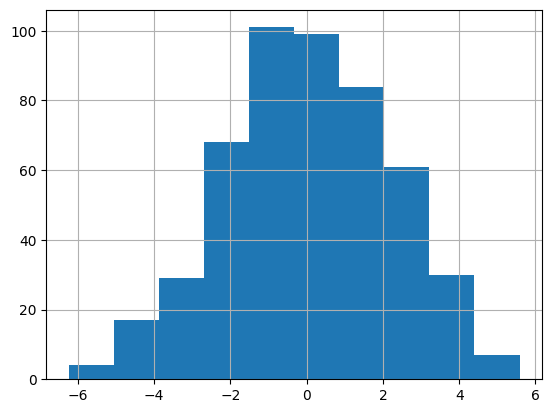

In [ ]:
y = np.random.normal(0, 2, 500)
plt.hist(y)
plt.grid()

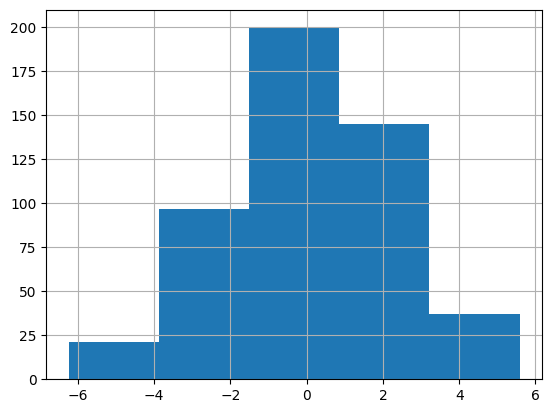

In [ ]:
plt.hist(y, bins=5)
plt.grid()

#### 1.6.5 Круговые диаграммы

**Круговые диаграммы** - это наглядный способ показать доли компонент в наборе. Они идеально подходят для отчетов, презентаций и т.п. Для построения круговых диаграмм в `matplotlib` используется функция `pie()`.

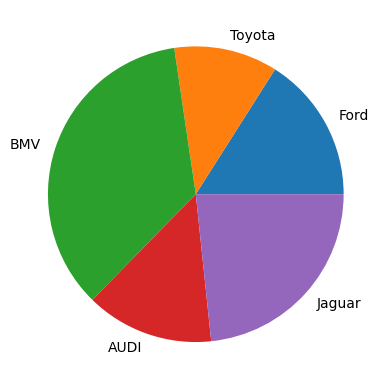

In [ ]:
vals = [24, 17, 53, 21, 35]
labels = ['Ford', 'Toyota', 'BMV', 'AUDI', 'Jaguar']
plt.pie(vals, labels=labels)
plt.axis = 'equal'

Пример, демонстрирующий работу с параметрами функции `pie()`:

(-1.2541693468510096,
 1.1991449549931066,
 -1.1017808888721372,
 1.1374061134115763)

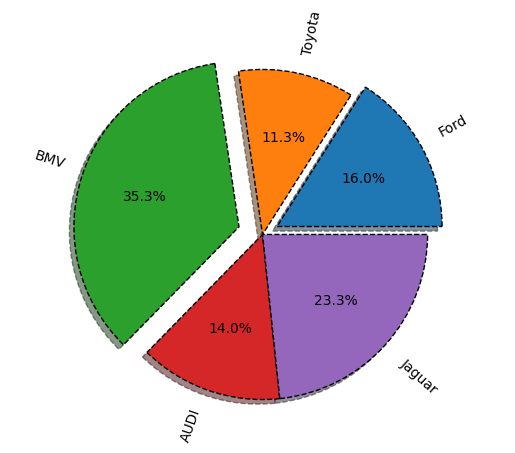

In [ ]:
vals = [24, 17, 53, 21, 35]
labels = ['Ford', 'Toyota', 'BMV', 'AUDI', 'Jaguar']
explode = (0.1, 0, 0.15, 0, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'}, rotatelabels=True)
ax.axis('equal')

## 2 Библиотека Seaborn

`Seaborn` — это библиотека для создания статистических графиков, которая строится поверх `matplotlib`. Она разработана для упрощения создания красивых статистических графиков и известна наличием стиля по умолчанию, который выглядит лучше, чем предлагаемые другими библиотеками.
По соглашению эта библиотека импортируется как `sns`:

In [ ]:
import seaborn as sns

`Seaborn` содержит наборы выборочных данных, используемых в предоставленной документации и руководствах. Эти наборы данных также удобный источник для
изучения свойств `Seaborn`. Их можно загрузить как датафреймы `Pandas` с помощью функции `sns.load_dataset()` с именем набора данных в качестве аргумента.

Ниже показано, как загрузить набор данных автомобильных аварий и выбрать столбцы для работы. Этот набор данных содержит сведения о причинах несчастных случаев и стоимости для компаний по страхованию от несчастных случаев.

In [ ]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes = car_crashes[['total', 'not_distracted', 'alcohol']]
# total - число водителей, участвовавших в столкновениях со смертельным исходом
# not_distracted - процент водителей, участвовавших в столкновениях со смертельным исходом, которые не отвлекались
# alcohol - процент водителей, участвовавших в столкновениях со смертельным исходом, которые находились в состоянии алкогольного опьянения
car_crashes.head()

,total,not_distracted,alcohol
0,18.8,18.048,5.640
1,18.1,16.290,4.525
2,18.6,15.624,5.208
3,22.4,21.056,5.824
4,12.0,10.920,3.360


В примере ниже функция `Seaborn` `sns.relplot()` используется для построения графика, отображающего зависимость между двумя столбцами:

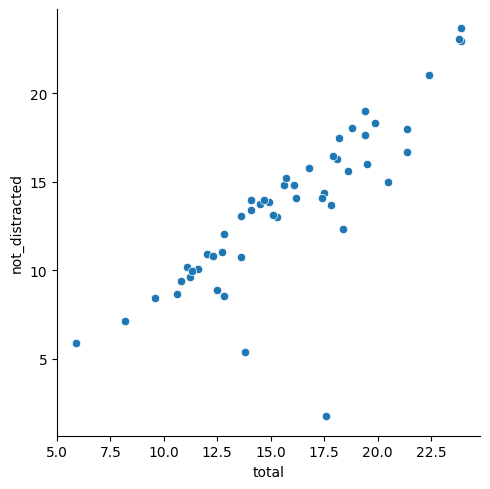

In [ ]:
sns.relplot(data=car_crashes, x='total', y='not_distracted')

С помощью функции `sns.histplot()` построим график распределения данных столбца `total`. Достаточно передать этой функции набор числовых данных, и она автоматически определит интервалы, сгруппирует данные и покажет на графике агрегированные значения.

<Axes: xlabel='total', ylabel='Count'>

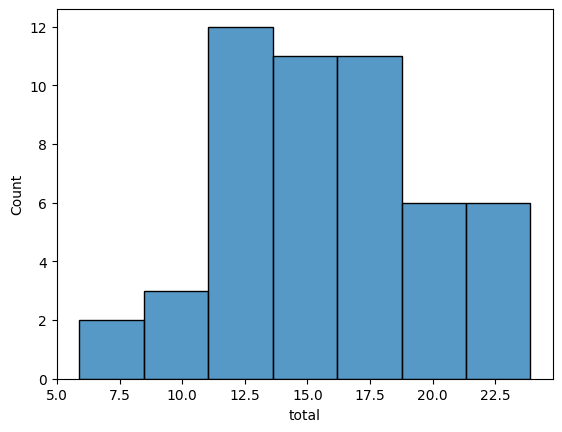

In [ ]:
sns.histplot(car_crashes['total'])

Также можно в аргументе `bins` указать количество групп, на которые нужно разбить значения характеристики. В этом случае интервал группировки будет рассчитан автоматически.

<Axes: xlabel='total', ylabel='Count'>

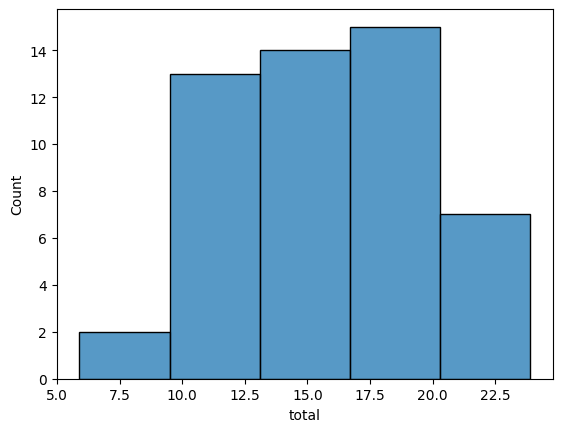

In [ ]:
sns.histplot(car_crashes['total'], bins=5)

`Seaborn` предлагает много типов графиков. Один из наиболее полезных типов для поиска корреляции в данных — `sns.pairplot()`. Он создает сетку осей, отображающих взаимосвязь между всеми столбцами датафрейма. Создать парный график с помощью набора данных `iris` можно так:

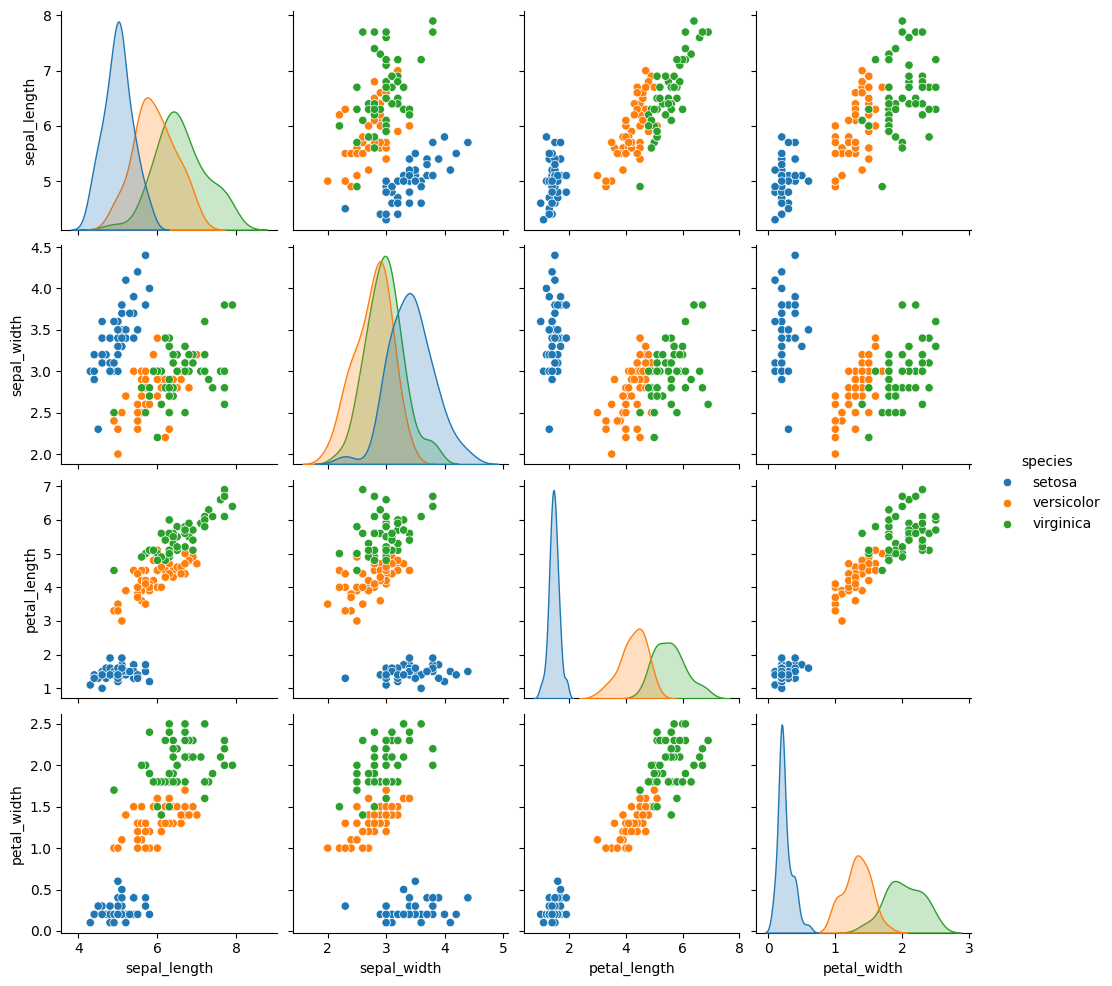

In [ ]:
df = sns.load_dataset('iris')
sns.pairplot(df, hue='species')

## Контрольные вопросы
1. Цели визуализации данных. Библиотека `matplotlib` для визуализации данных в Python.
2. Основные модули и классы `matplotlib`.
3. Создание изображений в `matplotlib`: типовой шаблон, заголовок диаграммы и подписи осей, координатная сетка и масштабирование, легенда, текст и аннотациии, а также несколько диаграмм в изображении.
4. Основные типы диаграмм: График. Стили линий. Круговая диаграмма. Столбчатая (линейчатая) диаграмма. Гистограмма.